<a href="https://colab.research.google.com/github/Abhinav2001com/ML-1/blob/main/customer_data_another_method(AF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
Customer_data=pd.read_csv('/content/drive/MyDrive/DATA_files/customer (2).csv')

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
Customer_data

,customer_id,Age,Churn,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,FrequentFlyer,CustomerLoyaltyScore,Gender
0,AIC1099,34,No,Middle Income,Exclusive Travel Package,No,Yes,No,0.0,NaN
1,AIC8182,34,Yes,Low Income,Ultimate Travel Package,Yes,No,Yes,5.0,Male
2,AIC4163,37,No,Middle Income,Premium Travel Package,Yes,No,No,0.0,Female
3,AIC7636,30,No,Middle Income,Standard Travel Package,No,No,No,0.0,Male
4,AIC7867,30,No,Low Income,Basic Travel Package,No,No,No,0.0,Female
...,...,...,...,...,...,...,...,...,...,...
949,AIC9892,31,No,Low Income,Basic Travel Package,No,No,Yes,1.0,Female
950,AIC3539,30,No,Middle Income,Ultimate Travel Package,No,Yes,No,0.0,Male
951,AIC9595,37,No,Middle Income,Luxury Travel Package,No,No,No,0.0,Female
952,AIC0560,30,No,Low Income,Basic Travel Package,Yes,Yes,No,0.0,NaN


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [13]:
Customer_data.dtypes

,0
customer_id,object
Age,int64
Churn,object
AnnualIncomeClass,object
ServicesOpted,object
AccountSyncedToSocialMedia,object
BookedHotelOrNot,object
FrequentFlyer,object
CustomerLoyaltyScore,float64
Gender,object


In [14]:
Customer_data.isnull().sum()

,0
customer_id,0
Age,0
Churn,0
AnnualIncomeClass,0
ServicesOpted,0
AccountSyncedToSocialMedia,0
BookedHotelOrNot,0
FrequentFlyer,60
CustomerLoyaltyScore,60
Gender,47


In [15]:
Customer_data['CustomerLoyaltyScore']=Customer_data['CustomerLoyaltyScore'].fillna(Customer_data['CustomerLoyaltyScore'].mode()[0])

In [16]:
Customer_data.isnull().sum()

,0
customer_id,0
Age,0
Churn,0
AnnualIncomeClass,0
ServicesOpted,0
AccountSyncedToSocialMedia,0
BookedHotelOrNot,0
FrequentFlyer,60
CustomerLoyaltyScore,0
Gender,47


In [17]:
Customer_data['Gender']=Customer_data['Gender'].fillna(Customer_data['Gender'].mode()[0])

In [18]:
Customer_data.isnull().sum()

,0
customer_id,0
Age,0
Churn,0
AnnualIncomeClass,0
ServicesOpted,0
AccountSyncedToSocialMedia,0
BookedHotelOrNot,0
FrequentFlyer,60
CustomerLoyaltyScore,0
Gender,0


In [19]:
Customer_data['FrequentFlyer']=Customer_data['FrequentFlyer'].fillna(Customer_data['FrequentFlyer'].mode()[0])

In [20]:
Customer_data.isnull().sum()

,0
customer_id,0
Age,0
Churn,0
AnnualIncomeClass,0
ServicesOpted,0
AccountSyncedToSocialMedia,0
BookedHotelOrNot,0
FrequentFlyer,0
CustomerLoyaltyScore,0
Gender,0


In [21]:
encoder=LabelEncoder()
Customer_data['AnnualIncomeClass']=encoder.fit_transform(Customer_data['AnnualIncomeClass'])
Customer_data['ServicesOpted']=encoder.fit_transform(Customer_data['ServicesOpted'])
Customer_data['AccountSyncedToSocialMedia']=encoder.fit_transform(Customer_data['AccountSyncedToSocialMedia'])
Customer_data['BookedHotelOrNot']=encoder.fit_transform(Customer_data['BookedHotelOrNot'])
Customer_data['Gender']=encoder.fit_transform(Customer_data['Gender'])
Customer_data['FrequentFlyer']=encoder.fit_transform(Customer_data['FrequentFlyer'])

In [22]:
x=Customer_data.drop(['customer_id','Churn'],axis=1)
y=Customer_data['Churn'].apply(lambda x:1 if x=='Yes'else 0)

In [23]:
x

,Age,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,FrequentFlyer,CustomerLoyaltyScore,Gender
0,34,2,1,0,1,0,0.0,0
1,34,1,5,1,0,1,5.0,1
2,37,2,3,1,0,0,0.0,0
3,30,2,4,0,0,0,0.0,1
4,30,1,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...
949,31,1,0,0,0,1,1.0,0
950,30,2,5,0,1,0,0.0,1
951,37,2,2,0,0,0,0.0,0
952,30,1,0,1,1,0,0.0,0


In [24]:
y

,Churn
0,0
1,1
2,0
3,0
4,0
...,...
949,0
950,0
951,0
952,0


In [25]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [26]:
x_scaled

array([[ 0.56690365,  1.01680185, -0.44544968, ..., -0.65432692,
        -0.46303606, -0.94292572],
       [ 0.56690365, -0.3610802 ,  1.77655812, ...,  1.52828804,
         3.37815004,  1.06052893],
       [ 1.46628183,  1.01680185,  0.66555422, ..., -0.65432692,
        -0.46303606, -0.94292572],
       ...,
       [ 1.46628183,  1.01680185,  0.11005227, ..., -0.65432692,
        -0.46303606, -0.94292572],
       [-0.63226726, -0.3610802 , -1.00095162, ..., -0.65432692,
        -0.46303606, -0.94292572],
       [-0.33247453, -1.73896225, -1.00095162, ...,  1.52828804,
         0.30520116,  1.06052893]])

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=2)

In [28]:
print(x.shape,x_train.shape,x_test.shape)

(954, 8) (763, 8) (191, 8)


In [29]:
print(x_train)

[[-1.23185272  1.01680185  1.22105617 ... -0.65432692 -0.46303606
  -0.94292572]
 [-1.23185272  1.01680185  0.11005227 ... -0.65432692 -0.46303606
   1.06052893]
 [ 0.56690365 -0.3610802   0.11005227 ... -0.65432692 -0.46303606
  -0.94292572]
 ...
 [-0.33247453 -0.3610802  -1.00095162 ...  1.52828804  0.30520116
   1.06052893]
 [-0.63226726  1.01680185  1.22105617 ... -0.65432692 -0.46303606
  -0.94292572]
 [-0.93205999  1.01680185 -1.00095162 ... -0.65432692 -0.46303606
  -0.94292572]]


In [30]:
print(y_train)

471    1
188    0
370    0
702    0
463    0
      ..
534    0
584    0
493    0
527    0
168    0
Name: Churn, Length: 763, dtype: int64


RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       144
           1       0.75      0.81      0.78        47

    accuracy                           0.88       191
   macro avg       0.84      0.86      0.85       191
weighted avg       0.89      0.88      0.89       191

88.48167539267016
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
LogisticRegression()
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       144
           1       0.66      0.49      0.56        47

    accuracy                           0.81 

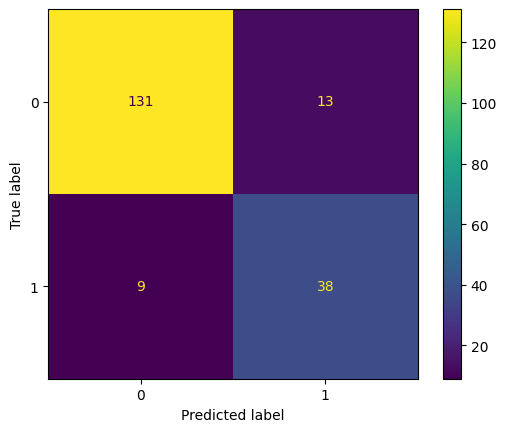

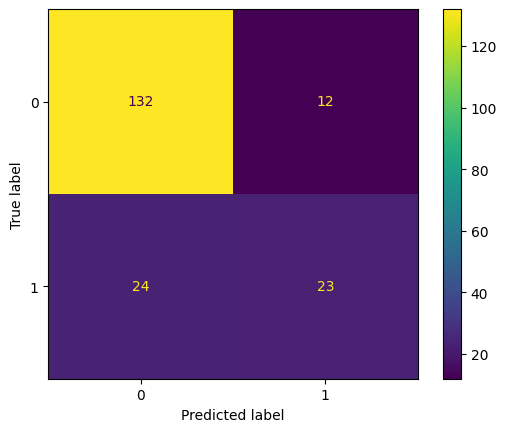

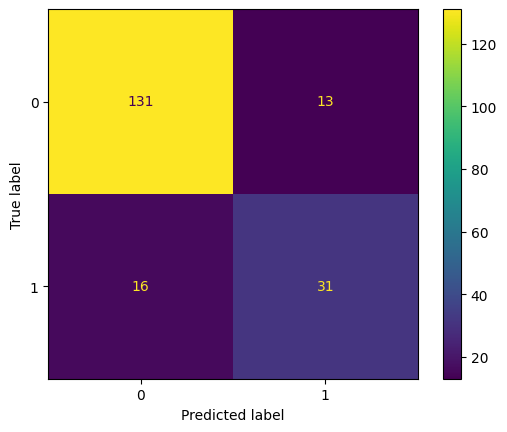

In [31]:
rf=RandomForestClassifier()
lg=LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=3)
models=[rf,lg,knn]
accuracy_score_os=[]
for select in models:
  print(select)
  select.fit(x_train,y_train)
  test_prediction=select.predict(x_test)
  test_prediction
  print(classification_report(y_test,test_prediction))
  print(ConfusionMatrixDisplay.from_predictions(y_test,test_prediction))
  accuracy_os=accuracy_score(y_test,test_prediction)*100
  print(accuracy_os)
  accuracy_score_os.append(accuracy_os)
  print("--"*200)

In [32]:
accuracy_score_os=[]
models=[rf,lg,knn]

In [33]:
for select in models:
  print(f"trainning{select}...")
  select.fit(x_train,y_train)
  test_pred=select.predict(x_test)
  accuracy=accuracy_score(y_test,test_pred)
  accuracy_score_os.append(accuracy)
  print(f"accuyacy of {select.__class__.__name__}: {accuracy:.4f}")

trainningRandomForestClassifier()...
accuyacy of RandomForestClassifier: 0.8796
trainningLogisticRegression()...
accuyacy of LogisticRegression: 0.8115
trainningKNeighborsClassifier(n_neighbors=3)...
accuyacy of KNeighborsClassifier: 0.8482


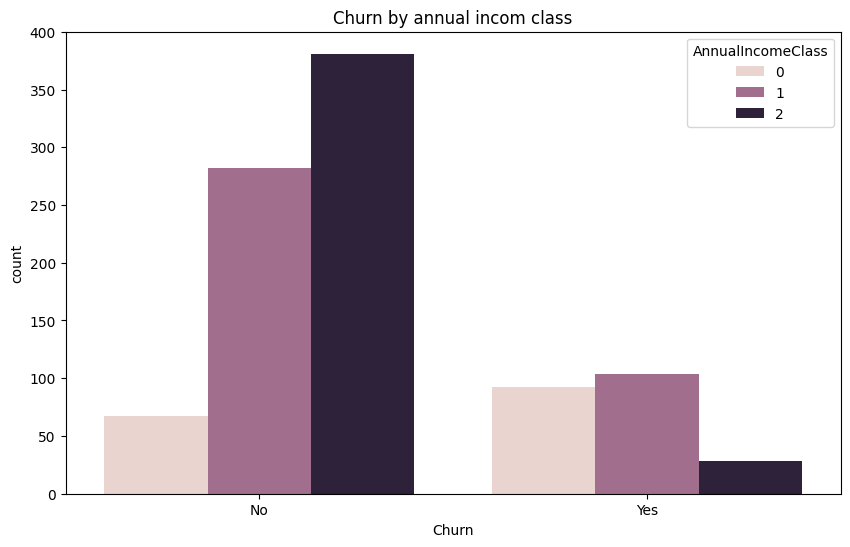

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(data=Customer_data,x='Churn',hue='AnnualIncomeClass')
plt.title('Churn by annual incom class')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

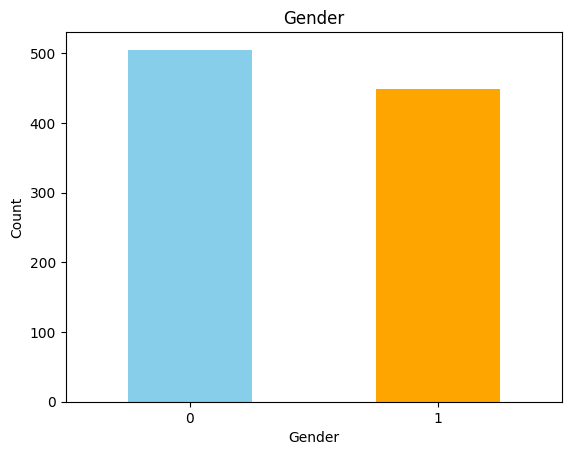

In [35]:
Customer_data['Gender'].value_counts().plot(kind='bar',color=['skyblue','orange'])
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show

In [39]:
x

,Age,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,FrequentFlyer,CustomerLoyaltyScore,Gender
0,34,2,1,0,1,0,0.0,0
1,34,1,5,1,0,1,5.0,1
2,37,2,3,1,0,0,0.0,0
3,30,2,4,0,0,0,0.0,1
4,30,1,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...
949,31,1,0,0,0,1,1.0,0
950,30,2,5,0,1,0,0.0,1
951,37,2,2,0,0,0,0.0,0
952,30,1,0,1,1,0,0.0,0


In [50]:
y_new_data = [[34	,2,	3,1,0,0,0,0]]
y_new = rf.predict(scaler.transform(y_new_data))

In [51]:
y_new

array([0])

In [47]:
y

,Churn
0,0
1,1
2,0
3,0
4,0
...,...
949,0
950,0
951,0
952,0
